In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose, DecomposeResult

In [40]:
def set_date_index(input_df: pd.DataFrame, col_name:str = 'Date') -> pd.DataFrame:
    """Given a pandas df, parse and set date column to index.
        col_name will be removed and set as datetime index.

    Args:
        input_df (pandas dataframe): Original pandas dataframe
        col_name (string): Name of date column

    Returns:
        pandas dataframe: modified and sorted dataframe
    """
    # Copy df to prevent changing original
    modified_df = input_df.copy()

    # Infer datetime from col
    modified_df[col_name] = pd.to_datetime(modified_df[col_name])

    # Sort and set index
    modified_df.sort_values(col_name, inplace=True)
    modified_df.set_index(col_name, inplace=True)

    return modified_df

def combine_seasonal_cols(input_df: pd.DataFrame, seasonal_model_results: DecomposeResult):
    """Adds inplace new seasonal cols to df given seasonal results

    Args:
        input_df (pandas dataframe)
        seasonal_model_results (statsmodels DecomposeResult object)
    """
    # Add results to original df
    input_df['observed'] = seasonal_model_results.observed
    input_df['residual'] = seasonal_model_results.resid
    input_df['seasonal'] = seasonal_model_results.seasonal
    input_df['trend'] = seasonal_model_results.trend

    # NaN to Zero
    cols = ['observed']
    for col in cols:
        input_df[col] = input_df[col].replace(np.nan, 0)

In [41]:
df = pd.read_csv('./data/Electric_Production.csv')
set_date_index(input_df=df, col_name='DATE')
df['DATE'] = df['DATE'].astype('datetime64[ns]')
df.rename(columns={'IPG2211A2N': 'MWH', 'DATE': 'Date'}, inplace=True)
df.tail()

,Date,MWH
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212
396,2018-01-01,129.4048


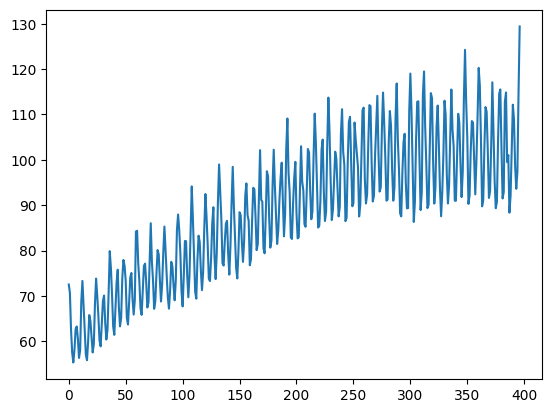

In [42]:
fig, ax = plt.subplots()
ax.plot(range(0, len(df)), df['MWH'])
plt.show()

In [43]:
sd = seasonal_decompose(df['MWH'], period=12)
combine_seasonal_cols(input_df=df, seasonal_model_results=sd)
df.head()

,Date,MWH,observed,residual,seasonal,trend
0,1985-01-01,72.5052,72.5052,NaN,13.213039,NaN
1,1985-02-01,70.6720,70.6720,NaN,5.744747,NaN
2,1985-03-01,62.4502,62.4502,NaN,-0.493680,NaN
3,1985-04-01,57.4714,57.4714,NaN,-9.478355,NaN
4,1985-05-01,55.3151,55.3151,NaN,-9.222160,NaN


In [46]:
def mround(x, m=5):
    """Helper method for multiple round"""
    return int(m * round(float(x)/m))

def plot_components(df):
    """Plot data for initial visualization, ultimately visualized in Power BI

    Args:
        df (pandas dataframe)
    """
    df_axis = df.fillna(0)
    ymin = mround(np.min([df_axis.observed, df_axis.trend, df_axis.seasonal, df_axis.residual]),5)
    ymax = mround(np.max([df_axis.observed, df_axis.trend, df_axis.seasonal, df_axis.residual]),5)
    ymin -= 5
    ymax += 5

    plt.figure(figsize=(15, 15))

    plt.subplot(4,1,1)
    plt.title("Original Data")
    plt.ylim(ymin, ymax)
    plt.plot(df.index, df.observed)

    plt.subplot(4,1,2)
    plt.title("Trend")
    plt.ylim(ymin, ymax)
    plt.plot(df.index, df.trend)

    plt.subplot(4,1,3)
    plt.title("Seasonal")
    plt.ylim(ymin, ymax)
    plt.plot(df.index, df.seasonal)

    plt.subplot(4,1,4)
    plt.title("Residual")
    plt.ylim(ymin, ymax)
    plt.plot(df.index, df.residual)

    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

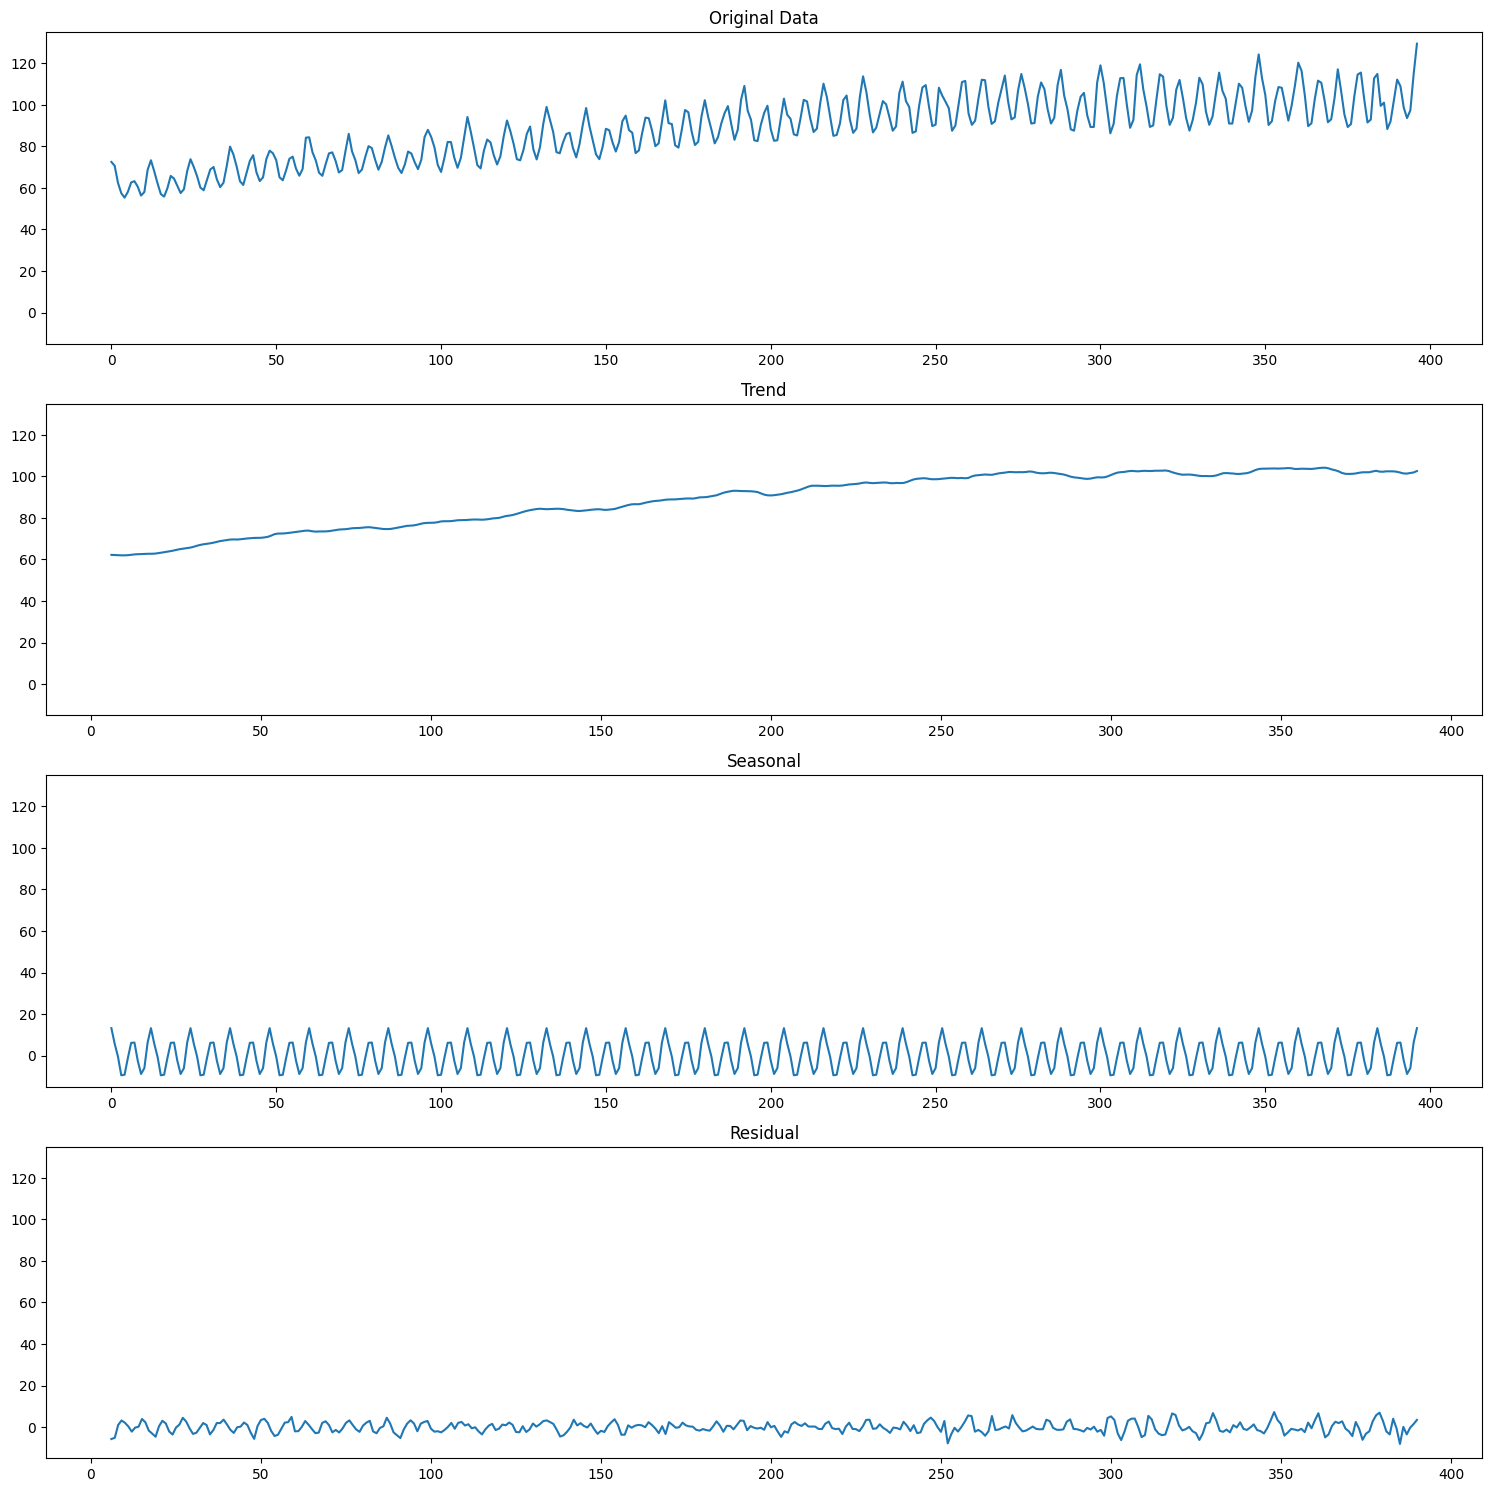

In [47]:
plot_components(df)